Integrantes:
- Juan Guillermo Duque Montoya
- Alejandro Marin Marin

# **Pendulo compuesto**

El péndulo compuesto, también conocido
como péndulo físico, es un concepto fundamental en la mecánica de sólidos rígidos. A diferencia del péndulo simple, que se considera una masa puntual suspendida de un hilo inextensible y sin masa, el péndulo compuesto es un cuerpo rígido con una distribución de masa específica y un centro de masa (CM) distinto del punto de suspensión.

Algunas características importantes del péndulo compuesto son:

1. Eje de rotación: El péndulo compuesto oscila libremente alrededor de un eje de rotación fijo, representado como ZZ' en su definición.

2. Centro de masa (CM): El centro de masa del cuerpo rígido no coincide necesariamente con el punto de suspensión. La distancia entre el centro de masa y el eje de rotación es un factor clave que determina el periodo y las propiedades oscilatorias del péndulo.

3. Distribución de masa: A diferencia del péndulo simple, el péndulo compuesto tiene una distribución de masa no uniforme. Esto implica que la masa no está concentrada en un solo punto, sino que se distribuye a lo largo de todo el cuerpo rígido.

4. Momento de inercia: El momento de inercia del cuerpo rígido respecto al eje de rotación desempeña un papel crucial en la dinámica del péndulo compuesto. El momento de inercia depende de la distribución de masa y la geometría del cuerpo.

5. Periodo de oscilación: El periodo de oscilación del péndulo compuesto depende no solo de la longitud efectiva (distancia entre el centro de masa y el eje de rotación) y la aceleración gravitacional, sino también del momento de inercia del cuerpo rígido.

El estudio del péndulo compuesto es fundamental en la mecánica de sólidos rígidos, ya que permite analizar el movimiento oscilatorio de objetos con geometrías y distribuciones de masa más complejas que el péndulo simple. Esto tiene aplicaciones en diversos campos, como la ingeniería, la física y la dinámica de sistemas.

El movimiento del péndulo compuesto se puede describir mediante la siguiente ecuación diferencial:

$$I_o \ddot{\theta} + mgb \sin\theta = 0$$

Donde:

$I_o$ es el momento de inercia respecto al eje de rotación que pasa por el punto $O$
$m$ es la masa del cuerpo rígido
$g$ es la aceleración debido a la gravedad
$b$ es la distancia desde el eje de rotación al centro de masa
$\theta$ es el ángulo de desplazamiento respecto a la vertical
Esta ecuación se puede reescribir como:

$$\ddot{\theta} + \frac{mgb}{I_o} \sin\theta = 0$$

Definiendo $\omega_0^2 = \frac{mgb}{I_o}$, tenemos:

$$\ddot{\theta} + \omega_0^2 \sin\theta = 0$$

Donde $\omega_0$ es la frecuencia angular natural del péndulo compuesto.

Para pequeños ángulos, $\sin\theta \approx \theta$, y la ecuación se reduce a la del movimiento armónico simple:

$$\ddot{\theta} + \omega_0^2 \theta = 0$$

La solución general de esta ecuación es:

$$\theta(t) = A \cos(\omega_0 t + \phi)$$

Donde $A$ y $\phi$ son constantes determinadas por las condiciones iniciales.

In [ ]:
# @title La gráfica del desplazamiento angular $\theta(t)$ en función del tiempo para el movimiento armónico simple es:
from IPython.display import display, Latex

latex_code = r'''\begin{tikzpicture}
    \begin{axis}[
        xlabel=$t$,
        ylabel=$\theta(t)$,
        xmin=0, xmax=6.28,
        ymin=-1.1, ymax=1.1,
        grid=major,
        samples=100,
        domain=0:6.28
    ]
    \addplot[thick, smooth] {cos(deg(x))};
    \end{axis}
\end{tikzpicture}
'''

display(Latex(latex_code))

 Para el caso en el que el desplazamiento angular θ es muy pequeño. En este caso, se puede hacer la aproximación sen(θ) ≈ θ. Utilizando esta aproximación, la aceleración angular α se puede escribir como:


 $$\alpha \approx -\left(\frac{m \cdot g \cdot b}{I_o}\right) \theta$$

 Donde:

- m es la masa del cuerpo rígido.
- g es la aceleración debido a la gravedad.
- b es la distancia desde el eje de rotación al centro de masa.
- I_o es el momento de inercia respecto al eje de rotación.

Esta ecuación describe un movimiento armónico simple, donde la aceleración angular es proporcional al desplazamiento angular, pero con signo opuesto.


 **Ecuación para la aceleración tangencial del centro de masa:**

$$a_{tang} = \alpha \cdot r = \alpha \cdot b$$

Donde r es la distancia desde el eje de rotación al centro de masa.

In [ ]:
# @title Gráfica interactiva que muestra el movimiento armónico simple del péndulo compuesto cuando el ángulo θ es pequeño:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
from ipywidgets import widgets

def pendulum_plot(A, w, phi):
    t = np.linspace(0, 10, 1000)
    theta = A * np.cos(w * t + phi)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(t, theta)
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Desplazamiento angular θ (rad)')
    ax.set_title('Movimiento armónico simple del péndulo compuesto')
    ax.grid(True)

    plt.show()

interactive_plot = interactive(pendulum_plot, A=widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Amplitud'),
                               w=widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Frecuencia angular'),
                               phi=widgets.FloatSlider(value=0.0, min=0.0, max=6.28, step=0.1, description='Fase inicial'))

display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='Amplitud', max=2.0, min=0.1), FloatSlider(value=1.0,…

Ingrese la longitud del primer segmento del péndulo (m): 234
Ingrese la longitud del segundo segmento del péndulo (m): 23
Ingrese el ángulo inicial del primer segmento (en grados): 34
Ingrese el ángulo inicial del segundo segmento (en grados): 45


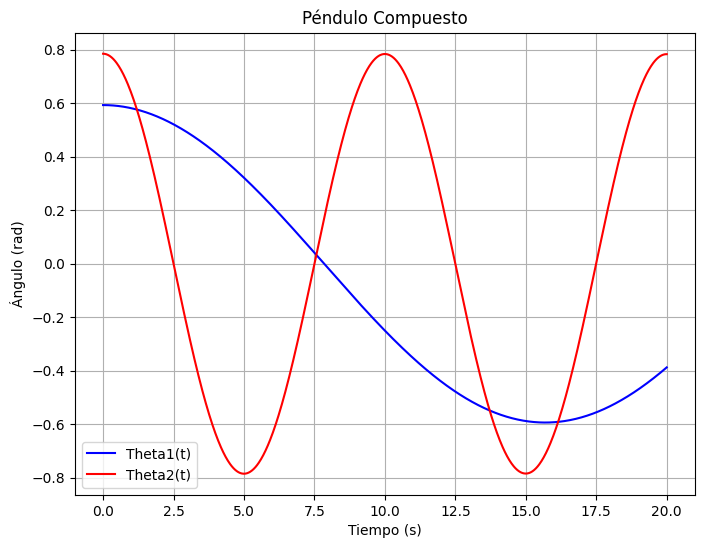

In [ ]:
# @title Ejemplo: Pêndulo compuesto Interactivo
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def pendulo_compuesto(t, y, l1, l2, g):
    """
    Ecuaciones diferenciales para el péndulo compuesto.
    y[0] = theta1, y[1] = omega1, y[2] = theta2, y[3] = omega2
    """
    theta1, omega1, theta2, omega2 = y
    dydt = [omega1, -g/l1 * np.sin(theta1), omega2, -g/l2 * np.sin(theta2)]
    return dydt

def pendulo_compuesto_interactivo():
    # Parámetros del péndulo
    l1 = float(input("Ingrese la longitud del primer segmento del péndulo (m): "))
    l2 = float(input("Ingrese la longitud del segundo segmento del péndulo (m): "))
    g = 9.81  # Aceleración debida a la gravedad (m/s^2)

    # Ángulo inicial
    theta1_0 = float(input("Ingrese el ángulo inicial del primer segmento (en grados): ")) * np.pi / 180.0
    theta2_0 = float(input("Ingrese el ángulo inicial del segundo segmento (en grados): ")) * np.pi / 180.0

    # Velocidad angular inicial
    omega1_0 = 0.0
    omega2_0 = 0.0

    # Condiciones iniciales
    y0 = [theta1_0, omega1_0, theta2_0, omega2_0]

    # Tiempo de integración
    t_span = [0, 20]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    # Solución del sistema de ecuaciones diferenciales
    sol = solve_ivp(pendulo_compuesto, t_span, y0, args=(l1, l2, g), t_eval=t_eval)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(t_eval, sol.y[0], 'b-', label='Theta1(t)')
    plt.plot(t_eval, sol.y[2], 'r-', label='Theta2(t)')
    plt.title('Péndulo Compuesto')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Ángulo (rad)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejecutar la función interactiva
pendulo_compuesto_interactivo()


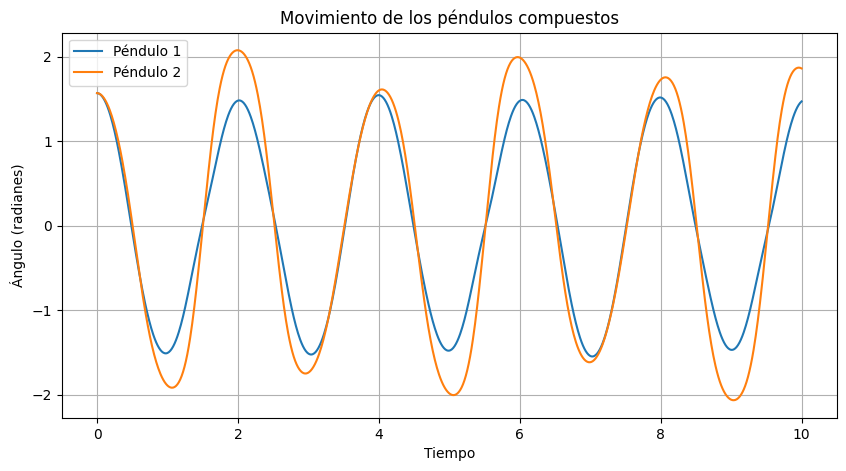

In [ ]:
# @title Ejemplo 2: Pêndulo compuesto
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición de las ecuaciones diferenciales para el péndulo compuesto
def pendulum_composite(t, y, L1, L2, m1, m2, g):
    theta1, omega1, theta2, omega2 = y

    dydt = [omega1,
            -m2/m1*L2/L1*omega2**2*np.sin(theta1-theta2) - (m1+m2)*g/L1*np.sin(theta1),
            omega2,
            (L1/L2*(m1+m2)*omega1**2*np.sin(theta1-theta2) - (m1+m2)*g*np.sin(theta2))/((m1+m2)*L2)]

    return dydt

# Parámetros del sistema
L1 = 1.0  # Longitud del primer péndulo
L2 = 0.8  # Longitud del segundo péndulo
m1 = 1.0  # Masa del primer péndulo
m2 = 0.5  # Masa del segundo péndulo
g = 9.81  # Aceleración gravitacional

# Condiciones iniciales (ángulo inicial y velocidad angular inicial para cada péndulo)
theta1_0 = np.pi/2  # Ángulo inicial del primer péndulo (en radianes)
omega1_0 = 0.0      # Velocidad angular inicial del primer péndulo
theta2_0 = np.pi/2  # Ángulo inicial del segundo péndulo (en radianes)
omega2_0 = 0.0      # Velocidad angular inicial del segundo péndulo

# Tiempo de integración
t_span = (0, 10)  # Tiempo inicial y final
t_eval = np.linspace(*t_span, 1000)  # Puntos de tiempo donde se evaluará la solución

# Resolviendo las ecuaciones diferenciales
sol = solve_ivp(pendulum_composite, t_span, [theta1_0, omega1_0, theta2_0, omega2_0],
                args=(L1, L2, m1, m2, g), t_eval=t_eval)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Péndulo 1')
plt.plot(sol.t, sol.y[2], label='Péndulo 2')
plt.title('Movimiento de los péndulos compuestos')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo (radianes)')
plt.legend()
plt.grid()
plt.show()


## **Teorema de Steiner**


El Teorema de Steiner, también conocido como el Teorema del Eje Paralelo, es un principio fundamental en la mecánica que describe cómo varía el momento de inercia de un objeto cuando se calcula respecto a un eje paralelo desplazado en comparación con el momento de inercia calculado respecto a su centro de masa. Este teorema es extremadamente útil en el análisis de sistemas físicos, ya que permite simplificar cálculos al considerar diferentes configuraciones de ejes.

Matemáticamente, el teorema se expresa como:

\[ I = I_c + m \cdot d^2 \]

Donde:

- \( I \) es el momento de inercia del objeto respecto al eje paralelo.
- \( I_c \) es el momento de inercia del objeto respecto a su centro de masa.
- \( m \) es la masa del objeto.
- \( d \) es la distancia entre el eje paralelo y el eje que pasa por el centro de masa.

Este teorema nos indica que el momento de inercia respecto a un eje paralelo es igual al momento de inercia respecto al centro de masa más el producto de la masa del objeto por el cuadrado de la distancia entre los dos ejes paralelos.

La importancia del Teorema de Steiner radica en su capacidad para simplificar el cálculo del momento de inercia en sistemas físicos, ya que nos permite trasladar el cálculo desde un eje de rotación más complejo (como el eje de simetría del objeto) a un eje paralelo más sencillo (como el eje de rotación de un cuerpo cercano), sin afectar el resultado final.


## **Relacion Pendulo Compuesto y Teorema de Steiner**

En el caso del péndulo compuesto, el Teorema de Steiner es útil para calcular el momento de inercia cuando el eje de rotación no pasa por el centro de masa. El período de oscilación del péndulo compuesto depende del momento de inercia y la distancia al centro de masa, y se calcula con la fórmula: $$ T = 2\pi \sqrt{\frac{I}{mgd}} $$Donde ( g ) es la aceleración debido a la gravedad.

In [2]:
# @title Ejemplo: Pêndulo compuesto Aplicando el teorema de steiner
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Definir la función para calcular el período del péndulo compuesto
def pendulum_period(m=1.0, d=0.5, I_CM=0.1):
    g = 9.81  # Aceleración debido a la gravedad en m/s^2
    I = I_CM + m * d**2  # Aplicar el Teorema de Steiner
    T = 2 * np.pi * np.sqrt(I / (m * g * d))  # Calcular el período

    print(f"El período del péndulo compuesto es: {T:.2f} segundos")

# Crear un gráfico interactivo
interactive_plot = interactive(pendulum_period, m=(0.1, 10.0, 0.1), d=(0.1, 2.0, 0.1), I_CM=(0.01, 0.5, 0.01))
interactive_plot


interactive(children=(FloatSlider(value=1.0, description='m', max=10.0, min=0.1), FloatSlider(value=0.5, descr…